## block diagram


 +-------------------------------------+
    |        Data Preparation            |
    +-------------------------------------+

           |
           v
    +-------------------------------------+
    |  1. Dataset Inspection             |
    |  2. Removing Unannotated Images    |
    |  3. XML to TXT Conversion          |
    |  4. Splitting Dataset              |
    |  5. Creating Data.yaml File        |
    +-------------------------------------+
           |
           v
    +-------------------------------------+
    |      Model Training (YOLOv8)        |
    | with 3 vechicle classes             |
    +-------------------------------------+
           |
           v
    +-------------------------------------+
    |         Inference                  |
    +-------------------------------------+

## WORKFLOW
### 1)Dataset Inspection:
Analyze the provided dataset, including images and XML annotation files.

Identify any inconsistencies or missing annotations.

### 2)Removing Unannotated Images:
Remove images without corresponding annotated XML files to ensure data consistency.

### 3)XML to TXT Conversion:
Convert XML annotation files to YOLOv8-compatible TXT format.

Extract three class of vehicles namely rickshaw,three wheelers(CNG) and minivan and their IDs, object coordinates (center_x, center_y, width, height).

### 4)Splitting Dataset:
Divide the dataset into training, validation, and test sets.

Maintain the proper balance of data in each split.

### 4)Creating Data.yaml File:
Generate a data.yaml file specifying:

Paths to training, validation, and test data folders.

Number of classes (3: rickshaw, three wheelers (CNG), minivan).

Class labels (names).

### 5)Model Training (YOLOv8):
Utilize a pre-trained YOLOv8 model.Yolov8 is pre trained with 4 vehicle classes namely car,bus,truck and motorcycle.

Fine-tune the model on my custom dataset with the specified classes.(rickshaw,three wheelers(CNG) and minivan)

Train the model for object detection.

### 6)Inference:
Use the trained model to make predictions on new or test images.

Obtain bounding box coordinates and class predictions.






### preparing dataset from kaggle

In [ ]:
pip install kaggle

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME']="razana2020"
os.environ['KAGGLE_KEY']="bca9d560e2ab16beea161d363fb93a23"

In [ ]:
! kaggle datasets download  pratikbarua/vehicle-detection-dataset

100% 1.39G/1.39G [00:19<00:00, 33.8MB/s]
100% 1.39G/1.39G [00:19<00:00, 77.9MB/s]


In [ ]:
!unzip /content/vehicle-detection-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Final Train Dataset/Dipto_ 311.jpg  
  inflating: train/Final Train Dataset/Dipto_ 311.xml  
  inflating: train/Final Train Dataset/Dipto_ 312.jpg  
  inflating: train/Final Train Dataset/Dipto_ 312.xml  
  inflating: train/Final Train Dataset/Dipto_ 313.jpg  
  inflating: train/Final Train Dataset/Dipto_ 313.xml  
  inflating: train/Final Train Dataset/Dipto_ 314.jpg  
  inflating: train/Final Train Dataset/Dipto_ 314.xml  
  inflating: train/Final Train Dataset/Dipto_ 315.jpg  
  inflating: train/Final Train Dataset/Dipto_ 315.xml  
  inflating: train/Final Train Dataset/Dipto_ 316.jpg  
  inflating: train/Final Train Dataset/Dipto_ 316.xml  
  inflating: train/Final Train Dataset/Dipto_ 317.jpg  
  inflating: train/Final Train Dataset/Dipto_ 317.xml  
  inflating: train/Final Train Dataset/Dipto_ 318.jpg  
  inflating: train/Final Train Dataset/Dipto_ 318.xml  
  inflating: train/Final Train Dataset/Dipto_ 319.jpg

#### checking the files to know the available annotations

In [ ]:
train_folder_path = "/content/train/Final Train Dataset"  # Replace with the actual path

# Get a list of all files in the "train" folder
all_files = os.listdir(train_folder_path)

# Separate files into XML, image, and other formats
xml_files = [filename for filename in all_files if filename.endswith(".xml")]
image_files = [filename for filename in all_files if filename.endswith((".png", ".jpg", ".jpeg"))]
other_files = [filename for filename in all_files if filename not in xml_files and filename not in image_files]

# Print counts for each type of file
print(f"Number of XML files: {len(xml_files)}")
print(f"Number of image files: {len(image_files)}")
print(f"Number of other files: {len(other_files)}")

# List the names of any other files found
if other_files:
    print("\nOther files found:")
    for filename in other_files:
        print(filename)

Number of XML files: 3003
Number of image files: 2858
Number of other files: 145

Other files found:
Navid_619.JPG
Navid_613.JPG
Dipto_348.JPG
Navid_640.JPG
Navid_616.JPG
Dipto_539.JPG
Navid_648.JPG
Dipto_350.JPG
Navid_352.JPG
Dipto_541.JPG
Navid_653.JPG
Navid_578.JPG
Navid_624.JPG
Navid_656.JPG
Dipto_ 330.JPG
Navid_651.JPG
Navid_607.JPG
Navid_657.JPG
Navid_586.JPG
Navid_660.JPG
Navid_612.JPG
Navid_582.JPG
Navid_633.JPG
Navid_628.JPG
Navid_650.JPG
Dipto_540.JPG
Navid_602.JPG
Navid_614.JPG
Navid_606.JPG
Dipto_535.JPG
Navid_599.JPG
Navid_618.JPG
Navid_353.JPG
Navid_597.JPG
Navid_609.JPG
Navid_625.JPG
Dipto_529.JPG
Dipto_344.JPG
Dipto_525.JPG
Dipto_543.JPG
Navid_635.JPG
Navid_626.JPG
Navid_661.JPG
Numan_(310).JPG
Navid_589.JPG
Navid_655.JPG
Numan_(312).JPG
Navid_605.JPG
Navid_351.JPG
Numan_(307).JPG
Navid_649.JPG
Navid_601.JPG
Navid_645.JPG
Dipto_536.JPG
Numan_(296).JPG
Dipto_537.JPG
Navid_596.JPG
Dipto_526.JPG
Numan_(303).JPG
Dipto_542.JPG
Navid_615.JPG
Navid_579.JPG
Navid_647.JPG
Numan_

#### taking only files having annotated xml files and save them in new folder for further processing

In [ ]:
import os
import shutil

# Define the paths to the original and new folders
original_train_folder = "/content/train/Final Train Dataset"  # Replace with the actual path
new_train_folder = "/content/new_train"  # Replace with the desired path for the new folder

# Create the new folder if it doesn't exist
os.makedirs(new_train_folder, exist_ok=True)

# Get a list of all XML files in the original folder
xml_files = [filename for filename in os.listdir(original_train_folder) if filename.endswith(".xml")]

# Iterate through the XML files and copy their corresponding JPG files
for xml_file in xml_files:
    # Create the corresponding JPG filename
    jpg_file = os.path.splitext(xml_file)[0] + ".jpg"

    # Check if the JPG file exists in the original folder
    if os.path.isfile(os.path.join(original_train_folder, jpg_file)):
        # Copy the JPG file and the XML file to the new folder
        shutil.copy(os.path.join(original_train_folder, jpg_file), os.path.join(new_train_folder, jpg_file))
        shutil.copy(os.path.join(original_train_folder, xml_file), os.path.join(new_train_folder, xml_file))

# Print a message indicating the process is complete
print("Images and XML files copied to the 'train_new' folder.")

Images and XML files copied to the 'train_new' folder.


In [ ]:
train_folder_path = "/content/new_train"  # Replace with the actual path

# Get a list of all files in the "train" folder
all_files = os.listdir(train_folder_path)

# Separate files into XML, image, and other formats
xml_files = [filename for filename in all_files if filename.endswith(".xml")]
image_files = [filename for filename in all_files if filename.endswith((".png", ".jpg", ".jpeg"))]
other_files = [filename for filename in all_files if filename not in xml_files and filename not in image_files]

# Print counts for each type of file
print(f"Number of XML files: {len(xml_files)}")
print(f"Number of image files: {len(image_files)}")
print(f"Number of other files: {len(other_files)}")

# List the names of any other files found
if other_files:
    print("\nOther files found:")
    for filename in other_files:
        print(filename)

Number of XML files: 2844
Number of image files: 2844
Number of other files: 0


#### creating yolo text file from annottaed xml files and save them in "labels" folder

In [ ]:
import os
import xml.etree.ElementTree as ET
from glob import glob

def extract_text(xml_file):
    try:
        tree = ET.parse(xml_file)
    except ET.ParseError as e:
        print(f"Error parsing {xml_file}: {str(e)}")
        return None, None, None

    root = tree.getroot()
    # Check if all required elements are present
    if (
        root.find("path") is None
        or root.find("size") is None
        or root.find("size/width") is None
        or root.find("size/height") is None
    ):
        return None, None, None

    # Define a mapping of class names to class IDs
    class_mapping = {
        "rickshaw": 0,
        "three wheelers (CNG)": 1,
        "minivan": 2
    }

    # Extract object name, xmin, ymin, xmax, ymax
    info_list = []
    for obj in root.findall("object"):
        name = obj.find("name").text
        if name not in class_mapping:
            continue  # Skip objects with names other than specified

        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)

        info_list.append((class_mapping[name], xmin, ymin, xmax, ymax))

    # Get image file path
    image_path = os.path.join(root.find("path").text)

    # Extract width and height from the <size> element
    size = root.find("size")
    width = int(size.find("width").text)
    height = int(size.find("height").text)

    return image_path, width, height, info_list

xml_list = glob("/content/valid_format_folder/*.xml")

# Create a 'labels' directory if it doesn't exist
output_dir = "/content/labels"
os.makedirs(output_dir, exist_ok=True)

for xml_file in xml_list:
    image_path, width, height, info_list = extract_text(xml_file)
    if info_list is not None:
        # Create a text file for each XML file
        txt_file = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_file))[0] + ".txt")
        with open(txt_file, "w") as f:
            for class_id, xmin, ymin, xmax, ymax in info_list:
                # Normalize coordinates and write to the text file
                x_center = (xmin + xmax) / (2.0 * width)
                y_center = (ymin + ymax) / (2.0 * height)
                x_width = (xmax - xmin) / width
                y_height = (ymax - ymin) / height
                f.write(f"{class_id} {x_center} {y_center} {x_width} {y_height}\n")


* since yolov8 already pre-trained with 4 classes of vehicles i have taken 3 new classes from the images to custom train my model

#### checking for the proper format of xml files to extract info

In [ ]:
import os
import xml.etree.ElementTree as ET
from shutil import copyfile

# Create the output directory if it doesn't exist
output_dir = "/content/valid_format_folder"
os.makedirs(output_dir, exist_ok=True)

def is_valid_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
    except ET.ParseError as e:
        print(f"Error parsing {xml_file}: {str(e)}")
        return False

    root = tree.getroot()

    # Check if all required elements are present
    path_elem = root.find("path")
    size_elem = root.find("size")
    width_elem = size_elem.find("width")
    height_elem = size_elem.find("height")

    if path_elem is None or size_elem is None or width_elem is None or height_elem is None:
        return False

    # Check if there's at least one valid object
    valid_objects = False
    for obj in root.findall("object"):
        name_elem = obj.find("name")
        bndbox = obj.find("bndbox")

        if name_elem is not None and bndbox is not None:
            valid_objects = True
            break

    return valid_objects

# Source directory containing XML and corresponding PNG files
source_dir = "/content/new_train"

# Iterate through XML files in the source directory
for xml_file in os.listdir(source_dir):
    if xml_file.endswith(".xml"):
        xml_path = os.path.join(source_dir, xml_file)
        image_path = os.path.splitext(xml_path)[0] + ".jpg"  # Assuming PNG images with the same name as XML

        # Check if the XML file is valid
        if is_valid_xml(xml_path):
            # Copy the XML file to the valid_format_folder
            xml_destination = os.path.join(output_dir, xml_file)
            copyfile(xml_path, xml_destination)

            # Copy the corresponding image file to the valid_format_folder
            image_destination = os.path.join(output_dir, os.path.basename(image_path))
            copyfile(image_path, image_destination)

print("Valid XML files and their corresponding images have been copied to 'valid_format_folder'.")


Error parsing /content/new_train/231.xml: syntax error: line 1, column 0
Valid XML files and their corresponding images have been copied to 'valid_format_folder'.


In [ ]:
import os

# Directory containing valid XML and corresponding PNG files
valid_format_folder = "/content/new_train"

# Initialize counters
xml_count = 0
png_count = 0

# Iterate through files in the directory
for file_name in os.listdir(valid_format_folder):
    if file_name.endswith(".xml"):
        xml_count += 1
    elif file_name.endswith(".png") or file_name.endswith(".jpg"):
        png_count += 1

print(f"Number of XML files: {xml_count}")
print(f"Number of PNG files: {png_count}")


Number of XML files: 2844
Number of PNG files: 2844


### seperating images in "images" folder and text file in "labels" folder

In [ ]:
import os
import shutil

# Define source and destination directories
source_dir = "valid_format_folder"
destination_dir = "images"

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Get a list of all PNG files in the source directory
png_files = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]

# Copy each PNG file to the destination directory
for png_file in png_files:
    source_path = os.path.join(source_dir, png_file)
    destination_path = os.path.join(destination_dir, png_file)
    shutil.copy(source_path, destination_path)

print(f"Copied {len(png_files)} PNG files to '{destination_dir}'.")


Copied 2843 PNG files to 'images'.


In [ ]:
valid_format_folder = "/content/images"

# Initialize counters
xml_count = 0
png_count = 0

# Iterate through files in the directory
for file_name in os.listdir(valid_format_folder):
    if file_name.endswith(".xml"):
        xml_count += 1
    elif file_name.endswith(".png") or file_name.endswith(".jpg"):
        png_count += 1

print(f"Number of XML files: {xml_count}")
print(f"Number of JPG files: {png_count}")

Number of XML files: 0
Number of JPG files: 2843


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
model=YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 22.6MB/s]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image

# Load the image using Pillow
image_path = "/content/drive/MyDrive/yolov8/final_train/images/01.jpg"
image = Image.open(image_path)

# Get the dimensions (width and height) of the image
width, height = image.size

# Print the dimensions
print(f"Width: {width}, Height: {height}")


Width: 1200, Height: 800


In [ ]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [ ]:
%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=20  plots=True

/content/drive/MyDrive/yolov8
100% 21.5M/21.5M [00:00<00:00, 162MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz

In [ ]:
!ls runs/detect/train/

args.yaml					    train_batch1481.jpg
confusion_matrix.png				    train_batch1482.jpg
events.out.tfevents.1694332933.131bf9fa5213.1555.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1480.jpg				    weights


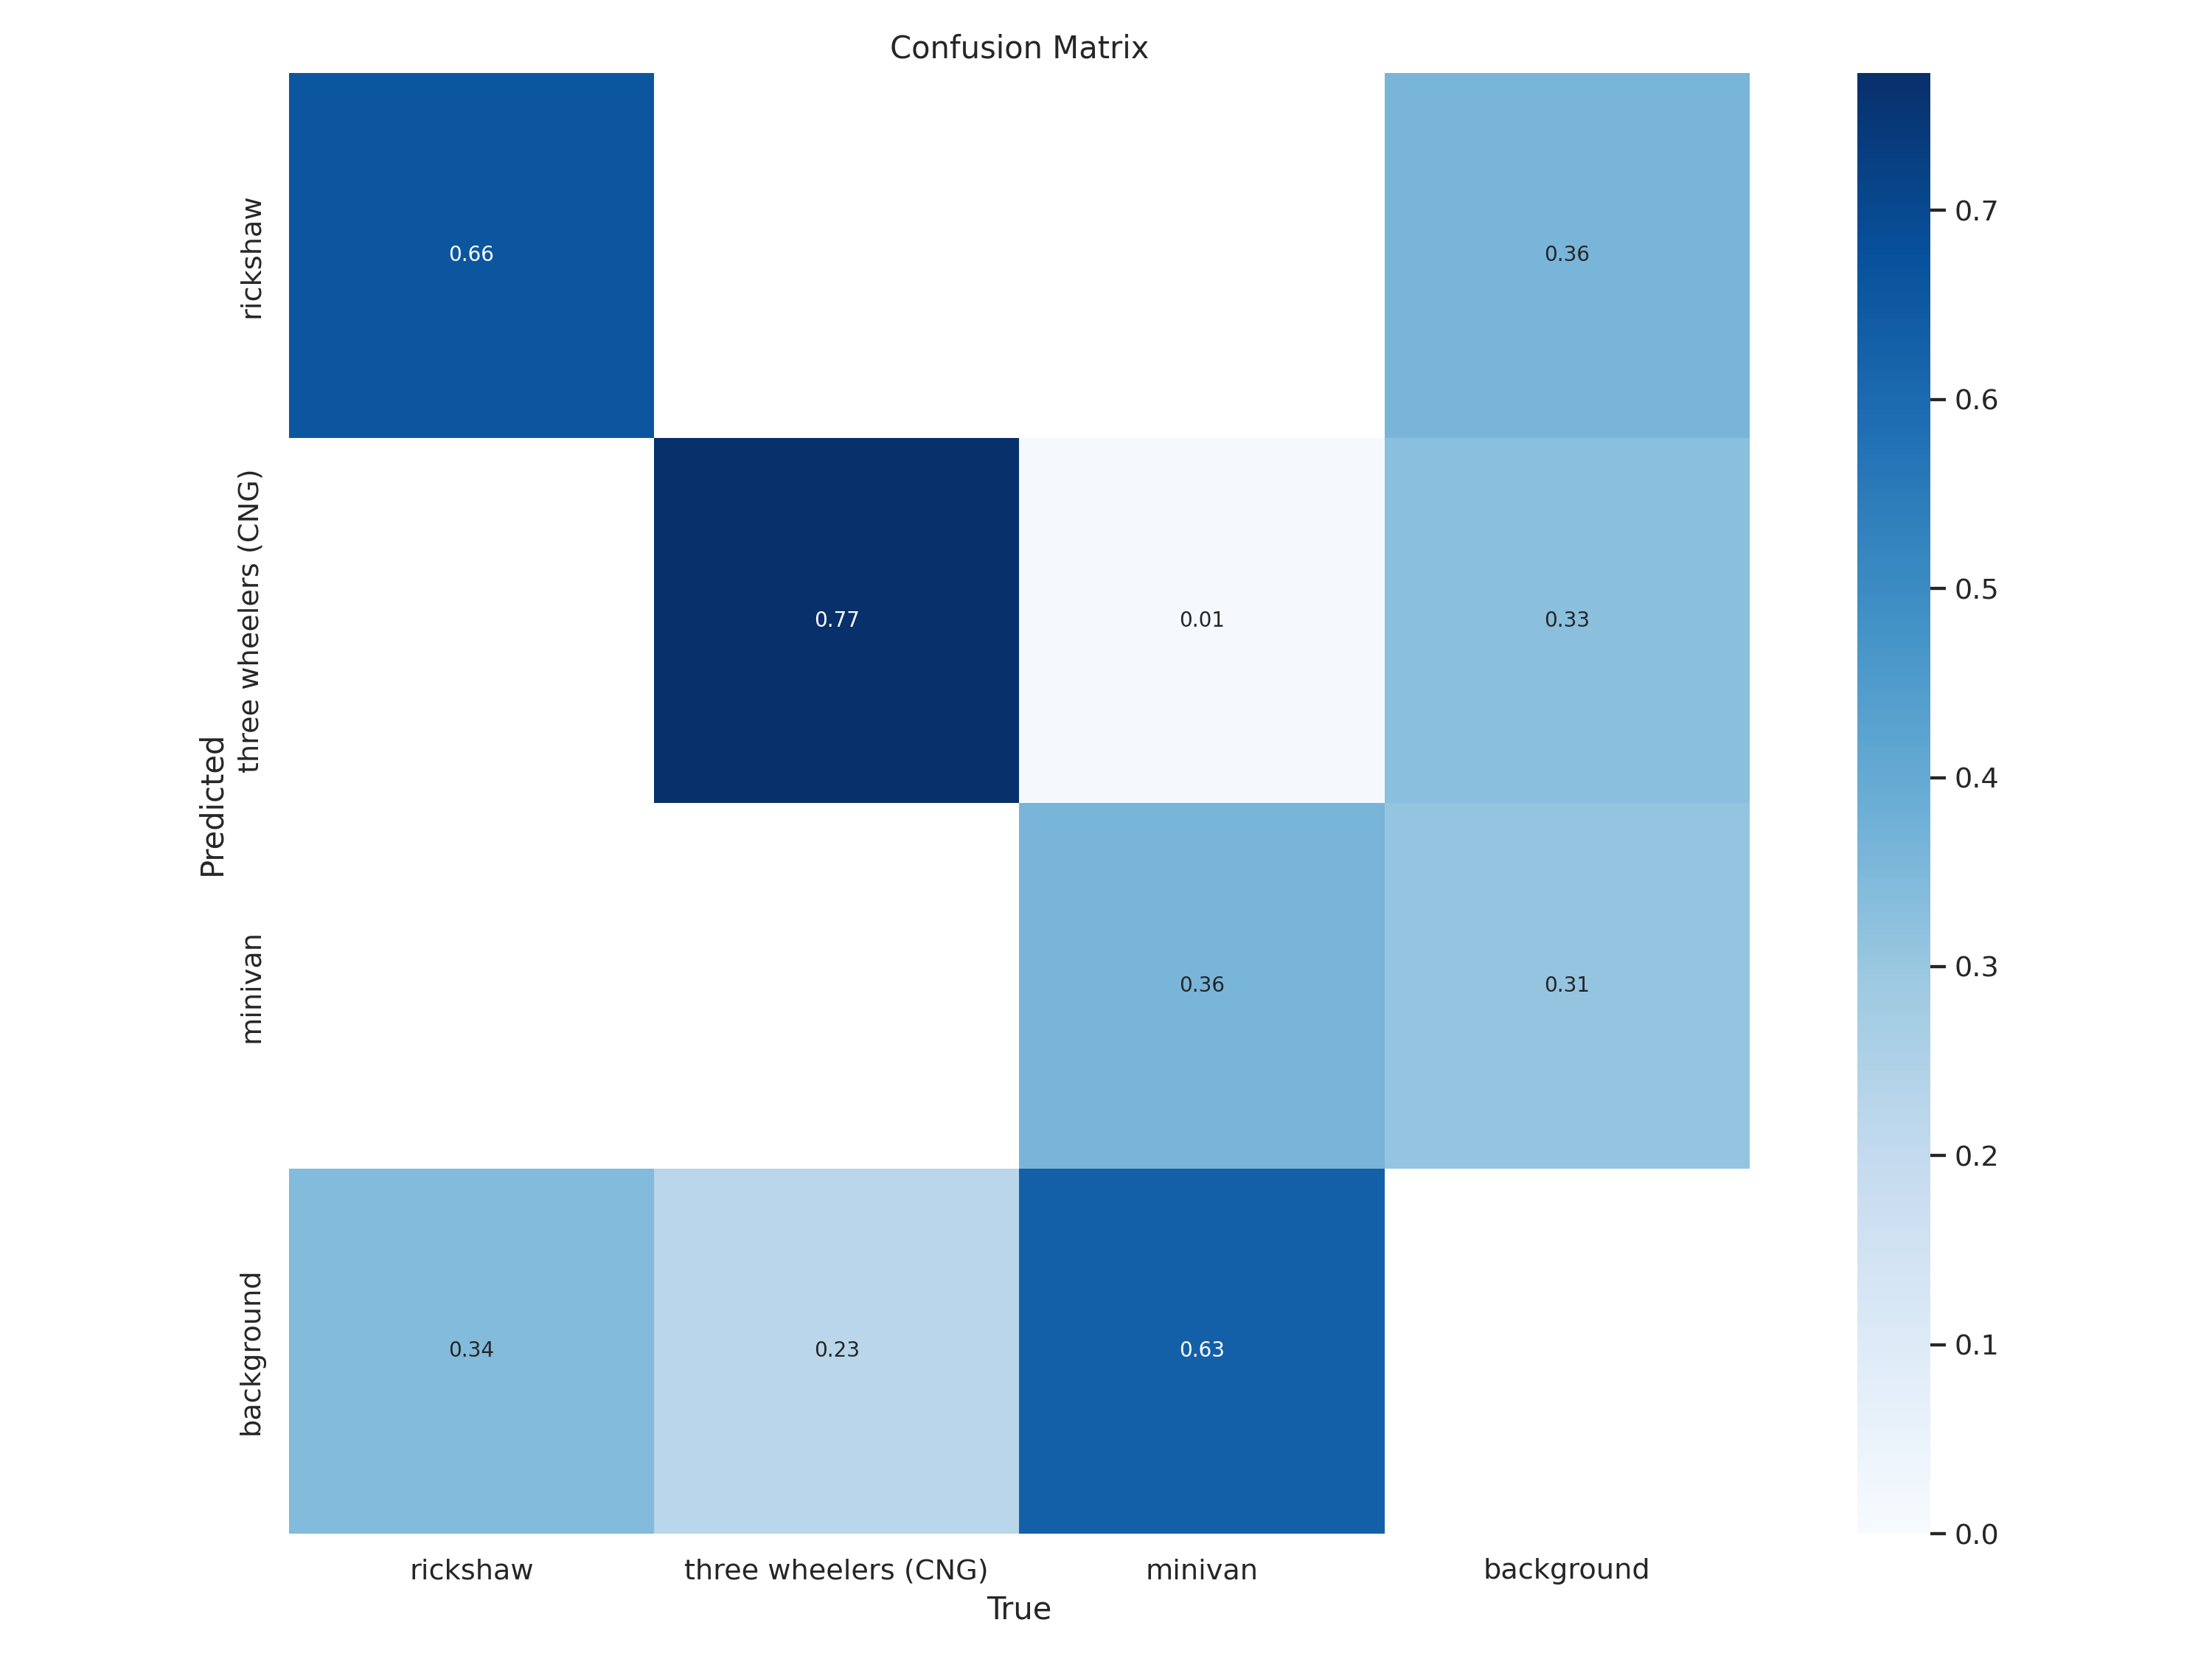

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
Image(filename='runs/detect/train2/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-09-10 09:50:22.012511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 09:50:23.101174: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8/final_val/labels.cache... 600 images, 211 backgrounds, 0 corrupt: 100% 600/600 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:36<00:00,  1.04it/s]
                   all        600       1451      0.675      0.561      0.606      0.402
              rickshaw        600

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

2023-09-10 09:53:22.464066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 09:53:23.410272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return